In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb
import sys, os
from textwrap import wrap

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/EternaBench_ChemMapping_Example_PunpVectors_Round1.json.zip')
packages = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/eternabench/package_metadata.csv')

Loading EternaBench ChemMapping Round 1 with example calculations


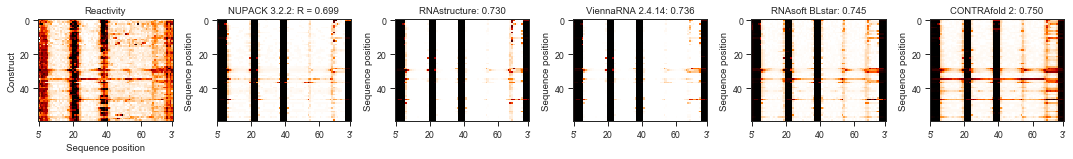

In [6]:
example_package_list=['nupack_99','rnastructure', 'vienna_2', 'rnasoft_blstar','contrafold_2']
titles = ['NUPACK 3.2.2: R = 0.699', 'RNAstructure: 0.730', 'ViennaRNA 2.4.14: 0.736', 'RNAsoft BLstar: 0.745', 'CONTRAfold 2: 0.750']

figure(figsize=(15,6))
subplot(1,6,1)

eb.plot.reactivity_heatmap(data, ind_range=[0,60])

#colorbar(fraction=0.04)
title('Reactivity')
xticks([0,20,40,60, 78],["5'",20, 40, 60, "3'"])

for i, package in enumerate(example_package_list):
    subplot(1,6,i+2)
    title("%s" % titles[i])
    eb.plot.punpaired_heatmap(data, ind_range=[0,60], package=package)
    #colorbar(fraction=0.04)
    xticks([0,20,40,60, 78],["5'",20, 40, 60, "3'"])
    xlabel('')

tight_layout()
#savefig('FIGURES/1/1C.pdf',bbox_inches='tight')

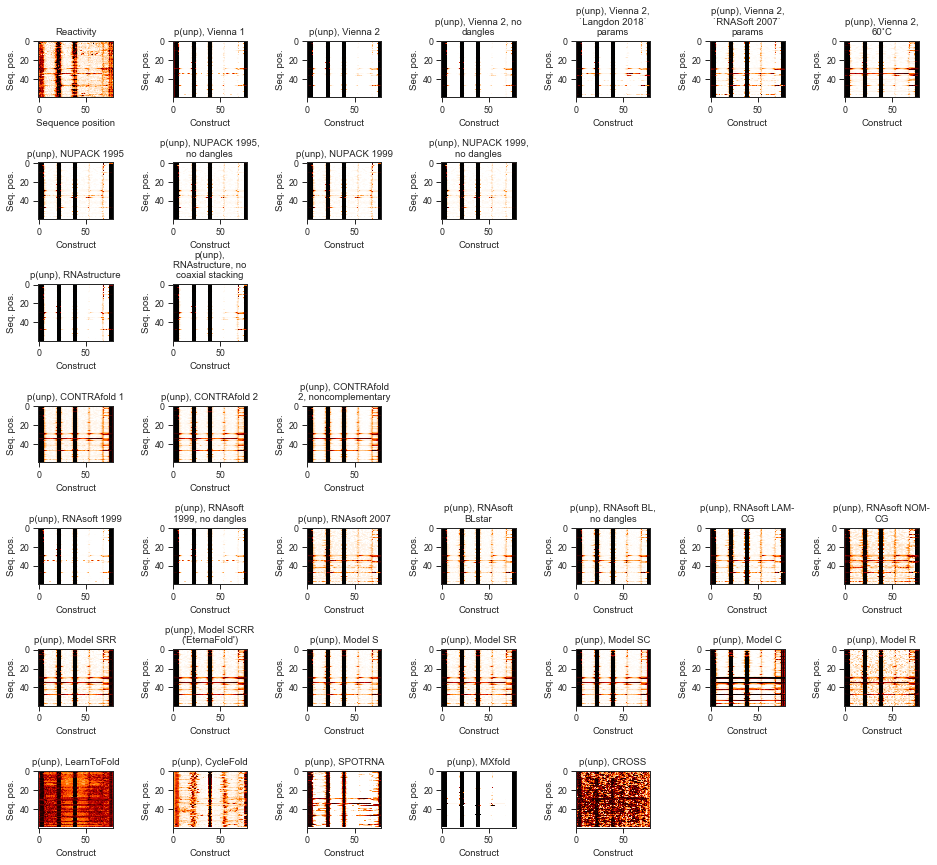

In [20]:
figure(figsize=(15,15))
subplot(9,8,1)
ctr=0
eb.plot.reactivity_heatmap(data, ind_range=[0,60])
title('Reactivity')
ylabel('Seq. pos.')

for j, pkg_kind in enumerate(packages.category.unique()):
    tmp = packages.loc[packages.category==pkg_kind]
    ctr=1
    for package, row in tmp.iterrows():
        if 'p_'+package in data.keys():
            if j==0:
                subplot(9,8,j*8+ctr+1)
            else:
                subplot(9,8,j*8+ctr)
            eb.plot.punpaired_heatmap(data, ind_range=[0,60], package=package)
            ylabel('Seq. pos.')
            title("\n".join(wrap("p(unp), %s" % row['title'],20)))

        ctr+=1

tight_layout()
savefig('FIGURES/SI/Figure_S2_heatplots_all_packages.pdf',bbox_inches='tight')
savefig('FIGURES/SI/Figure_S2_heatplots_all_packages.png',dpi=150, bbox_inches='tight')

In [12]:
palette, hue_order = eb.plot.get_palette()

stats = eb.load_CM_example_correlations()
stats = stats.merge(packages, on='package',how='left')
stats['category'] = [hue_order[x] for x in stats['category']]
stats = stats.sort_values('mean')

stats = stats.loc[stats.category!='EternaFold']

hue_order = hue_order[:-1]
palette = palette[:-1]

Loading bootstrapped pearson correlations for EternaBench ChemMapping Round 1


In [14]:
stats.to_clipboard()

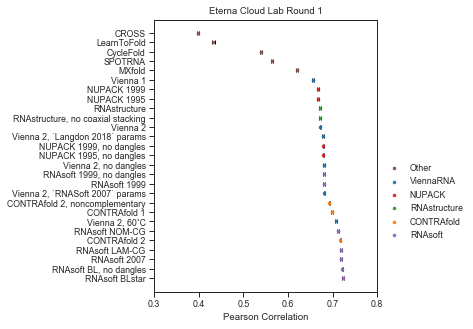

In [35]:
figureto_clipboarde=(4,5))
sns.pointplot(y='title',x='mean',data=stats,hue='category',palette=palette, scale=0.5,
              hue_order=hue_order, dodge=False, join=False)
errorbar(stats['mean'], range(len(stats)), xerr=stats['std'], fmt='.',color='k',markersize=0,zorder=0,capsize=2)
xlabel('Pearson Correlation')
title('Eterna Cloud Lab Round 1')
xlim([0.3,0.8])
ylabel('')
legend(bbox_to_anchor=(1,0.5),frameon=False)
savefig('FIGURES/SI/Figure_S1_Rnd1_other_packages_20May2022.pdf',bbox_inches='tight')
# savefig('FIGURES/SI/Figure_S1_Rnd1_other_packages.png',dpi=150, bbox_inches='tight')

(9.2, 4) [7.2, 2]


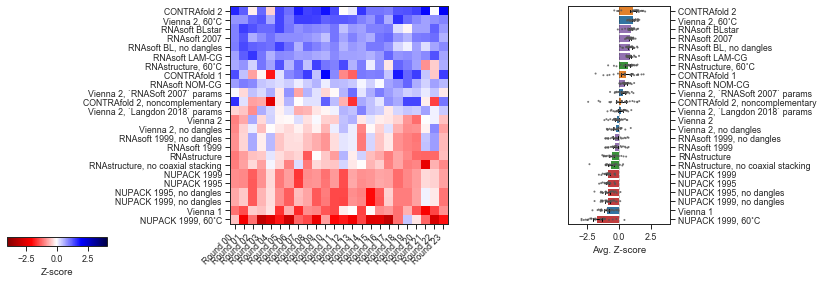

In [56]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_-efold_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-4, vmax=4, size=2, figsize=(9.2, 4), width_ratios=[7.2,2])

savefig('FIGURES/1/Figure_1EF_20may2022.pdf',bbox_inches='tight')

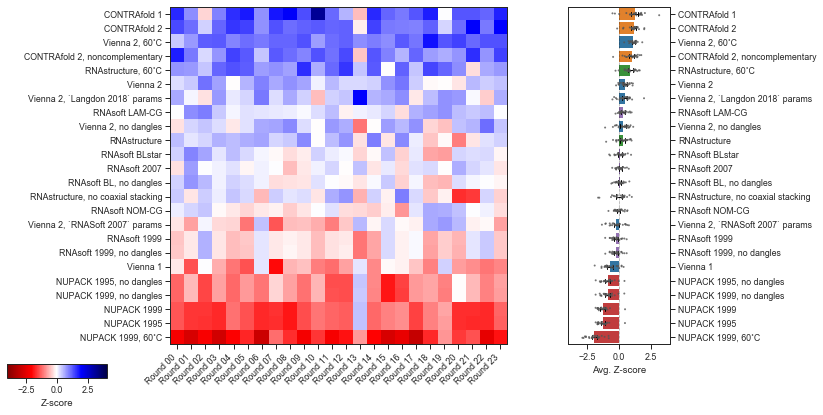

In [53]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_spearman_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, metric='spearman_zscore_by_Dataset_mean', vmin=-4,vmax=4, size=2)

savefig('FIGURES/SI/Figure_S_CM_spearman_20May2022.pdf',bbox_inches='tight')
# savefig('FIGURES/SI/Figure_S_CM_spearman.png',dpi=300,bbox_inches='tight')

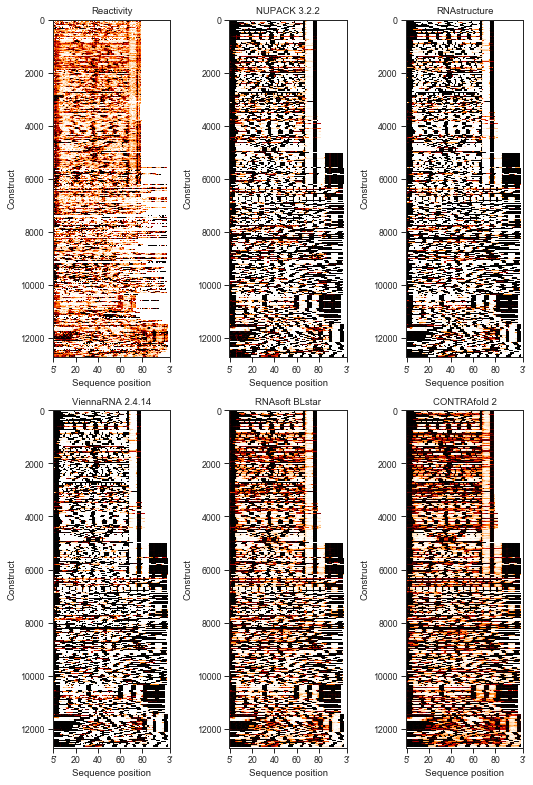

In [35]:
example_package_list=['nupack_99','rnastructure', 'vienna_2', 'rnasoft_blstar','contrafold_2']
titles = ['NUPACK 3.2.2', 'RNAstructure', 'ViennaRNA 2.4.14', 'RNAsoft BLstar', 'CONTRAfold 2']

figure(figsize=(7.5,11))

subplot(2,3,1)
tmp = pd.read_json('../data/EternaBench_ChemMapping_Filtered_10Jul2021.json.zip')
tmp = tmp.loc[tmp.Dataset.str.startswith('Round')]
eb.plot.reactivity_heatmap(tmp, aspect='auto')

#colorbar(fraction=0.04)
title('Reactivity')
xticks([0,20,40,60, 80,105],["5'",20, 40, 60, 80,"3'"])

for i, package in enumerate(example_package_list):
    tmp = pd.read_json('../data/ChemMappingCalculations/CM_%s.json.zip'% package)
    tmp = tmp.loc[tmp.Dataset.str.startswith('Round')]

    subplot(2,3,i+2)
    eb.plot.punpaired_heatmap(tmp, package=package,aspect='auto')
    #colorbar(fraction=0.04)
    ylabel('Construct')
    xticks([0,20,40,60, 80,105],["5'",20, 40, 60, 80,"3'"])
    xlabel('Sequence position')
    title("%s" % titles[i])

tight_layout()
savefig('FIGURES/SI/ED4_heatplots_all_rounds.pdf', bbox_inches='tight')